In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('Data/Discontinaunce_of_PEVs_in_California_Data_2021.03.01.csv')

In [31]:
df.head()

,"﻿""id. Response ID""",Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,...,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)",Survey_completion
0,1.0,81.0,PHEV,Continued,25.0,Male,13.92,0.0,5.0,5.0,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
1,2.0,310.0,BEV,Original,35.0,Male,10.25,7.0,5.0,5.0,...,5.0,5.0,5.0,NaN,Level 2,DC Fast,No charging,NaN,0.0,37.0
2,3.0,53.0,PHEV,Original,45.0,Male,NaN,2.0,3.0,4.0,...,2.0,2.0,3.0,"$200,000 to $249,999",No Charging,Level 2,No charging,27.0,1.0,40.0
3,4.0,271.0,BEV,Original,45.0,Male,8.68,1.0,5.0,5.0,...,5.0,4.0,4.0,I prefer not to answer,Level 2,No charging,No charging,24.0,0.0,40.0
4,5.0,84.0,BEV,Original,65.0,Male,NaN,0.0,5.0,5.0,...,5.0,4.0,5.0,"$200,000 to $249,999",Level 2,Level 2,No charging,24.0,1.0,40.0


In [32]:
df.columns

Index(['﻿"id. Response ID"', 'Electric driving range', 'oldcartype',
       'Discontinuance (inc. purchased lease) 2', 'Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Public charging', 'Second_vehicle',
       'Lease (1 lease, 0 other)', 'Survey_completion'],
      dtype='object')

# NaN value Handling

In [33]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [34]:
missing_values_table(df)

Your selected dataframe has 21 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
"Work charging (L1, L2, DC, none)",1661,34.4
Public charging,1282,26.5
Second_vehicle,1046,21.6
Oneway_commute_dist,1024,21.2
Household_income,747,15.4
Environmental impacts,689,14.3
Safety,689,14.3
Refuelling/Recharging costs,689,14.3
Reliability,689,14.3
Electric driving range.1,689,14.3


In [35]:
df['Discontinuance (inc. purchased lease) 2'].value_counts()

Original        2886
Continued       1530
Discontinued     417
Name: Discontinuance (inc. purchased lease) 2, dtype: int64

<AxesSubplot:xlabel='Discontinuance (inc. purchased lease) 2', ylabel='count'>

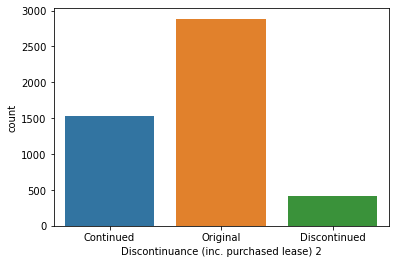

In [36]:
import seaborn as sns
y = df['Discontinuance (inc. purchased lease) 2']
sns.countplot(x = y, data = df)

In [37]:
#dropping discontinuance = original rows
df_cpy = df.copy()
df.drop(df.index[df['Discontinuance (inc. purchased lease) 2'] == 'Original'], inplace = True)
df.head()

,"﻿""id. Response ID""",Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,...,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)",Survey_completion
0,1.0,81.0,PHEV,Continued,25.0,Male,13.92,0.0,5.0,5.0,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
6,7.0,87.0,BEV,Continued,35.0,Male,8.54,0.0,2.0,3.0,...,4.0,1.0,3.0,"$50,000 to $99,999",Level 1,No charging,Level 2,82.0,1.0,40.0
9,11.0,84.0,BEV,Discontinued,55.0,Male,NaN,0.0,3.0,3.0,...,3.0,1.0,2.0,I prefer not to answer,Level 1,No charging,No charging,24.0,1.0,40.0
10,12.0,81.0,PHEV,Continued,55.0,Male,9.43,0.0,4.0,5.0,...,5.0,2.0,3.0,"$100,000 to $149,999",Level 2,Level 1,No charging,34.0,1.0,40.0
11,13.0,84.0,BEV,Continued,35.0,Male,16.32,0.0,5.0,5.0,...,5.0,2.0,4.0,"$150,000 to $199,999",Level 1,Level 1,Level 1 & Level 2,NaN,1.0,40.0


<AxesSubplot:xlabel='Discontinuance (inc. purchased lease) 2', ylabel='count'>

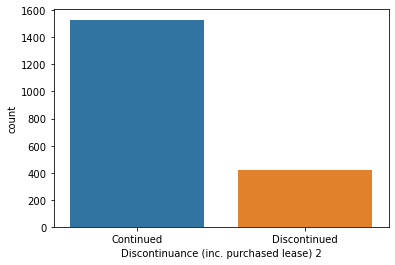

In [38]:
import seaborn as sns
y = df['Discontinuance (inc. purchased lease) 2']
sns.countplot(x = y, data = df)

In [39]:
df.drop(df.columns[[0,20]], axis=1, inplace=True)
df.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
0,81.0,PHEV,Continued,25.0,Male,13.92,0.0,5.0,5.0,5.0,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0
6,87.0,BEV,Continued,35.0,Male,8.54,0.0,2.0,3.0,3.0,4.0,1.0,3.0,"$50,000 to $99,999",Level 1,No charging,Level 2,82.0,1.0
9,84.0,BEV,Discontinued,55.0,Male,NaN,0.0,3.0,3.0,3.0,3.0,1.0,2.0,I prefer not to answer,Level 1,No charging,No charging,24.0,1.0
10,81.0,PHEV,Continued,55.0,Male,9.43,0.0,4.0,5.0,5.0,5.0,2.0,3.0,"$100,000 to $149,999",Level 2,Level 1,No charging,34.0,1.0
11,84.0,BEV,Continued,35.0,Male,16.32,0.0,5.0,5.0,5.0,5.0,2.0,4.0,"$150,000 to $199,999",Level 1,Level 1,Level 1 & Level 2,NaN,1.0


# Separating 'Continued' and 'Discontinued' Records

In [40]:
df_cont = df[df['Discontinuance (inc. purchased lease) 2'] == 'Continued']
df_discont = df[df['Discontinuance (inc. purchased lease) 2'] == 'Discontinued']

print(df['Discontinuance (inc. purchased lease) 2'].value_counts())
print('df_cont: ', len(df_cont))
print('df_discont: ', len(df_discont))

Continued       1530
Discontinued     417
Name: Discontinuance (inc. purchased lease) 2, dtype: int64
df_cont:  1530
df_discont:  417


# NaN Value Handling for 'Continued' Records

In [41]:
df_cont['Home Charging (L1, L2, None)'].value_counts()

Level 2        758
Level 1        566
No Charging    206
Name: Home Charging (L1, L2, None), dtype: int64

In [42]:
df_cont['Work charging (L1, L2, DC, none)'].value_counts()

No charging    461
Level 2        273
Level 1        153
DC Fast          9
Name: Work charging (L1, L2, DC, none), dtype: int64

In [43]:
df_cont['Public charging'].value_counts()

No charging                   645
Level 2                       298
DC Fast                        88
Level 1                        35
Level 2 & DC Fast              29
Level 1 & Level 2              19
Level 1, Level 2 & DC Fast      3
Level 1 & DC Fast               1
Name: Public charging, dtype: int64

In [44]:
df_cont.loc[df_cont['Public charging'].isin(['Level 1 & DC Fast', 'Level 2 & DC Fast', 'Level 1, Level 2 & DC Fast']), 'Public charging'] = 'DC Fast'
df_cont.loc[df_cont['Public charging'].isin(['Level 1 & Level 2']), 'Public charging'] = 'Level 2'
df_cont['Public charging'].value_counts()

C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


No charging    645
Level 2        317
DC Fast        121
Level 1         35
Name: Public charging, dtype: int64

In [45]:
df_cont['Household_income'].value_counts()

$150,000 to $199,999      245
$100,000 to $149,999      240
I prefer not to answer    208
$200,000 to $249,999      161
$50,000 to $99,999        122
$500,000 or more          111
$250,000 to $299,999      101
$300,000 to $349,999       65
$350,000 to $399,999       45
Less than $50,000          26
$400,000 to $449,999       24
$450,000 to $499,999       19
Name: Household_income, dtype: int64

In [46]:
df_cont.replace('I prefer not to answer', np.nan, inplace=True)
df_cont['Household_income'].value_counts()

C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


$150,000 to $199,999    245
$100,000 to $149,999    240
$200,000 to $249,999    161
$50,000 to $99,999      122
$500,000 or more        111
$250,000 to $299,999    101
$300,000 to $349,999     65
$350,000 to $399,999     45
Less than $50,000        26
$400,000 to $449,999     24
$450,000 to $499,999     19
Name: Household_income, dtype: int64

In [47]:
df_cont['Gender'].value_counts()

Male                      1137
Female                     331
Decline to state            21
TransFemale/Transwoman       1
Genderqueer/non-binary       1
Name: Gender, dtype: int64

In [48]:
df_cont.replace('Decline to state', np.nan, inplace=True)
df_cont.replace('Genderqueer/non-binary', np.nan, inplace=True)
df_cont.replace('TransFemale/Transwoman', np.nan, inplace=True)
df_cont['Gender'].value_counts()

Male      1137
Female     331
Name: Gender, dtype: int64

# NaN Value Handling for 'Continued' Records

In [49]:
missing_values_table(df_cont)

Your selected dataframe has 19 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
"Work charging (L1, L2, DC, none)",634,41.4
Public charging,412,26.9
Household_income,371,24.2
Second_vehicle,265,17.3
Oneway_commute_dist,231,15.1
Safety,143,9.3
Refuelling/Recharging costs,143,9.3
Environmental impacts,143,9.3
Reliability,143,9.3
Electric driving range.1,143,9.3


In [50]:
df_cont['Work charging (L1, L2, DC, none)'].fillna('No charging', inplace = True)
df_cont['Public charging'].fillna('No charging', inplace = True)
missing_values_table(df_cont)

Your selected dataframe has 19 columns.
There are 12 columns that have missing values.


C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Missing Values,% of Total Values
Household_income,371,24.2
Second_vehicle,265,17.3
Oneway_commute_dist,231,15.1
Safety,143,9.3
Refuelling/Recharging costs,143,9.3
Environmental impacts,143,9.3
Reliability,143,9.3
Electric driving range.1,143,9.3
Convenience of charging,143,9.3
Age,64,4.2


In [51]:
df_cont = df_cont.dropna()
print('df_cont: ', len(df_cont))
missing_values_table(df_cont)

df_cont:  860
Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Data Encoding of 'Continued' Records

In [52]:
from sklearn.preprocessing import OrdinalEncoder

Ordinal = OrdinalEncoder(categories=[['Continued', 'Discontinued']])
df_cont['Discontinuance (inc. purchased lease) 2'] = Ordinal.fit_transform(df_cont[['Discontinuance (inc. purchased lease) 2']])

Ordinal = OrdinalEncoder(categories=[['No Charging', 'Level 1', 'Level 2']])
df_cont['Home Charging (L1, L2, None)'] = Ordinal.fit_transform(df_cont[['Home Charging (L1, L2, None)']])

Ordinal = OrdinalEncoder(categories=[['No charging', 'Level 1', 'Level 2', 'DC Fast']])
df_cont['Work charging (L1, L2, DC, none)'] = Ordinal.fit_transform(df_cont[['Work charging (L1, L2, DC, none)']])

Ordinal = OrdinalEncoder(categories=[['No charging', 'Level 1', 'Level 2', 'DC Fast']])
df_cont['Public charging'] = Ordinal.fit_transform(df_cont[['Public charging']])

Ordinal = OrdinalEncoder(categories=[['Less than $50,000', '$50,000 to $99,999', '$100,000 to $149,999',
                                      '$150,000 to $199,999', '$200,000 to $249,999', '$250,000 to $299,999',
                                      '$300,000 to $349,999', '$350,000 to $399,999', '$400,000 to $449,999',
                                      '$450,000 to $499,999', '$500,000 or more']])
df_cont['Household_income'] = Ordinal.fit_transform(df_cont[['Household_income']])

Ordinal = OrdinalEncoder(categories=[['BEV', 'PHEV']])
df_cont['oldcartype'] = Ordinal.fit_transform(df_cont[['oldcartype']])

Ordinal = OrdinalEncoder(categories=[['Male', 'Female']])
df_cont['Gender'] = Ordinal.fit_transform(df_cont[['Gender']])

df_cont.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
0,81.0,1.0,0.0,25.0,0.0,13.92,0.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,0.0,0.0,2.0,25.0,1.0
6,87.0,0.0,0.0,35.0,0.0,8.54,0.0,2.0,3.0,3.0,4.0,1.0,3.0,1.0,1.0,0.0,2.0,82.0,1.0
10,81.0,1.0,0.0,55.0,0.0,9.43,0.0,4.0,5.0,5.0,5.0,2.0,3.0,2.0,2.0,1.0,0.0,34.0,1.0
22,84.0,0.0,0.0,75.0,0.0,19.89,0.0,4.0,5.0,5.0,5.0,2.0,5.0,1.0,2.0,0.0,0.0,23.0,1.0
27,11.0,1.0,0.0,65.0,0.0,31.30,0.0,5.0,4.0,4.0,5.0,2.0,4.0,7.0,1.0,0.0,0.0,26.0,0.0


# NaN Value Handling for 'Discontinued' Records

In [53]:
df_discont.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
9,84.0,BEV,Discontinued,55.0,Male,NaN,0.0,3.0,3.0,3.0,3.0,1.0,2.0,I prefer not to answer,Level 1,No charging,No charging,24.0,1.0
41,84.0,BEV,Discontinued,65.0,Female,11.33,0.0,5.0,5.0,5.0,5.0,1.0,5.0,"$150,000 to $199,999",Level 2,NaN,NaN,28.0,1.0
83,81.0,BEV,Discontinued,55.0,Male,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Level 1,NaN,NaN,38.0,1.0
87,87.0,BEV,Discontinued,65.0,Male,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Level 1,No charging,No charging,17.0,1.0
90,271.0,BEV,Discontinued,75.0,Male,1.75,0.0,5.0,5.0,5.0,5.0,5.0,5.0,I prefer not to answer,Level 2,Level 2,No charging,24.0,1.0


In [54]:
missing_values_table(df_discont)

Your selected dataframe has 19 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
"Work charging (L1, L2, DC, none)",192,46.0
Public charging,165,39.6
Oneway_commute_dist,101,24.2
Second_vehicle,95,22.8
Household_income,60,14.4
Safety,51,12.2
Refuelling/Recharging costs,51,12.2
Environmental impacts,51,12.2
Reliability,51,12.2
Electric driving range.1,51,12.2


In [55]:
df_discont['Public charging'].value_counts()

No charging          157
Level 2               46
DC Fast               23
Level 1               12
Level 2 & DC Fast     10
Level 1 & Level 2      3
Level 1 & DC Fast      1
Name: Public charging, dtype: int64

In [56]:
df_discont.loc[df_discont['Public charging'].isin(['Level 1 & DC Fast', 'Level 2 & DC Fast', 'Level 1, Level 2 & DC Fast']), 'Public charging'] = 'DC Fast'
df_discont.loc[df_discont['Public charging'].isin(['Level 1 & Level 2']), 'Public charging'] = 'Level 2'
df_discont['Public charging'].value_counts()

C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


No charging    157
Level 2         49
DC Fast         34
Level 1         12
Name: Public charging, dtype: int64

In [57]:
df_discont['Work charging (L1, L2, DC, none)'].value_counts()

No charging    110
Level 2         73
Level 1         38
DC Fast          4
Name: Work charging (L1, L2, DC, none), dtype: int64

In [58]:
df_discont['Household_income'].value_counts()

$100,000 to $149,999      72
$150,000 to $199,999      70
$50,000 to $99,999        56
I prefer not to answer    48
$200,000 to $249,999      35
$250,000 to $299,999      26
Less than $50,000         14
$300,000 to $349,999      11
$500,000 or more           9
$350,000 to $399,999       9
$400,000 to $449,999       5
$450,000 to $499,999       2
Name: Household_income, dtype: int64

In [59]:
df_discont.replace('I prefer not to answer', np.nan, inplace=True)
df_discont['Household_income'].value_counts()

C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


$100,000 to $149,999    72
$150,000 to $199,999    70
$50,000 to $99,999      56
$200,000 to $249,999    35
$250,000 to $299,999    26
Less than $50,000       14
$300,000 to $349,999    11
$500,000 or more         9
$350,000 to $399,999     9
$400,000 to $449,999     5
$450,000 to $499,999     2
Name: Household_income, dtype: int64

In [60]:
df_discont['Gender'].value_counts()

Male                      274
Female                    130
Decline to state            3
Genderqueer/non-binary      1
Name: Gender, dtype: int64

In [61]:
df_discont.replace('Decline to state', np.nan, inplace=True)
df_discont.replace('Genderqueer/non-binary', np.nan, inplace=True)
df_discont['Gender'].value_counts()

Male      274
Female    130
Name: Gender, dtype: int64

# Data Encoding of 'Discontinued' Records

In [62]:
from sklearn.preprocessing import OrdinalEncoder

Ordinal = OrdinalEncoder(categories=[['No charging', 'Level 1', 'Level 2', 'DC Fast']])
df_discont.loc[df_discont['Public charging'].notna(), ['Public charging']] = Ordinal.fit_transform(df_discont['Public charging'].dropna().values.reshape(-1,1))

Ordinal = OrdinalEncoder(categories=[['No charging', 'Level 1', 'Level 2', 'DC Fast']])
df_discont.loc[df_discont['Work charging (L1, L2, DC, none)'].notna(), ['Work charging (L1, L2, DC, none)']] = Ordinal.fit_transform(df_discont['Work charging (L1, L2, DC, none)'].dropna().values.reshape(-1,1))

Ordinal = OrdinalEncoder(categories=[['Less than $50,000', '$50,000 to $99,999', '$100,000 to $149,999',
                                      '$150,000 to $199,999', '$200,000 to $249,999', '$250,000 to $299,999',
                                      '$300,000 to $349,999', '$350,000 to $399,999', '$400,000 to $449,999',
                                      '$450,000 to $499,999', '$500,000 or more']])
df_discont.loc[df_discont['Household_income'].notna(), ['Household_income']] = Ordinal.fit_transform(df_discont['Household_income'].dropna().values.reshape(-1,1))

Ordinal = OrdinalEncoder(categories=[['Male', 'Female']])
df_discont.loc[df_discont['Gender'].notna(), ['Gender']] = Ordinal.fit_transform(df_discont['Gender'].dropna().values.reshape(-1,1))

Ordinal = OrdinalEncoder(categories=[['BEV', 'PHEV']])
df_discont['oldcartype'] = Ordinal.fit_transform(df_discont[['oldcartype']])

Ordinal = OrdinalEncoder(categories=[['Continued', 'Discontinued']])
df_discont['Discontinuance (inc. purchased lease) 2'] = Ordinal.fit_transform(df_discont[['Discontinuance (inc. purchased lease) 2']])

Ordinal = OrdinalEncoder(categories=[['No Charging', 'Level 1', 'Level 2']])
df_discont['Home Charging (L1, L2, None)'] = Ordinal.fit_transform(df_discont[['Home Charging (L1, L2, None)']])

C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\mehna\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

# Imputing NaN Values Using KNNImputer for 'Discontinued' Records

In [63]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) #default n_neighbors is 5 anyways
df_discont = pd.DataFrame(imputer.fit_transform(df_discont),columns = df_discont.columns)
#imputer.fit_transform(df_discont)
df_discont.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
0,84.0,0.0,1.0,55.0,0.0,13.718,0.0,3.0,3.0,3.0,3.0,1.0,2.0,3.0,1.0,0.0,0.0,24.0,1.0
1,84.0,0.0,1.0,65.0,1.0,11.330,0.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,2.0,1.0,0.8,28.0,1.0
2,81.0,0.0,1.0,55.0,0.0,11.314,0.0,4.8,4.4,5.0,4.8,2.4,2.2,3.4,1.0,0.6,1.6,38.0,1.0
3,87.0,0.0,1.0,65.0,0.0,6.824,0.0,5.0,5.0,5.0,4.8,2.4,4.6,1.6,1.0,0.0,0.0,17.0,1.0
4,271.0,0.0,1.0,75.0,0.0,1.750,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.4,2.0,2.0,0.0,24.0,1.0


In [64]:
df_discont = df_discont.dropna()
print('df_discont: ', len(df_discont))
missing_values_table(df_discont)

df_discont:  417
Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Merging 'Continued' and 'Discontinued' Dataframes

In [65]:
df2 = pd.concat([df_cont, df_discont], ignore_index=True)
df2 = df2.sample(frac=1).reset_index(drop=True)
df2.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
0,53.0,1.0,0.0,75.0,0.0,23.08,0.0,4.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,0.0,0.0,24.0,0.0
1,20.0,1.0,0.0,55.0,1.0,30.26,0.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0,1.0,0.0,0.0,31.0,1.0
2,270.0,0.0,1.0,45.0,0.0,13.91,0.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,2.0,0.0,24.0,1.0
3,271.0,0.0,0.0,75.0,0.0,1686.40,0.0,5.0,5.0,5.0,5.0,4.0,5.0,10.0,2.0,0.0,3.0,50.0,0.0
4,84.0,0.0,0.0,65.0,0.0,16.07,3.0,5.0,5.0,5.0,5.0,2.0,5.0,7.0,2.0,2.0,0.0,35.0,1.0


In [66]:
df2['Discontinuance (inc. purchased lease) 2'].value_counts()

0.0    860
1.0    417
Name: Discontinuance (inc. purchased lease) 2, dtype: int64

<AxesSubplot:xlabel='Discontinuance (inc. purchased lease) 2', ylabel='count'>

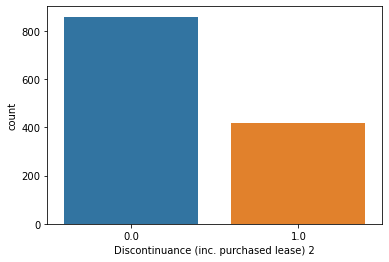

In [67]:
import seaborn as sns
y = df2['Discontinuance (inc. purchased lease) 2']
sns.countplot(x = y, data = df2)

# Normalization 

In [68]:
#scaler? 
df2 = (df2-df2.min())/(df2.max()-df2.min())
df2.head()

,Electric driving range,oldcartype,Discontinuance (inc. purchased lease) 2,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)"
0,0.145329,1.0,0.0,0.919355,0.0,0.011548,0.00,0.75,1.0,1.0,0.75,0.75,0.75,0.2,0.5,0.000000,0.0,0.122807,0.0
1,0.031142,1.0,0.0,0.596774,1.0,0.015152,0.00,1.00,1.0,1.0,1.00,0.75,1.00,0.1,0.5,0.000000,0.0,0.184211,1.0
2,0.896194,0.0,1.0,0.435484,0.0,0.006946,0.00,1.00,1.0,1.0,1.00,1.00,1.00,0.3,1.0,0.666667,0.0,0.122807,1.0
3,0.899654,0.0,0.0,0.919355,0.0,0.846326,0.00,1.00,1.0,1.0,1.00,0.75,1.00,1.0,1.0,0.000000,1.0,0.350877,0.0
4,0.252595,0.0,0.0,0.758065,0.0,0.008030,0.03,1.00,1.0,1.0,1.00,0.25,1.00,0.7,1.0,0.666667,0.0,0.219298,1.0


In [69]:
df2.columns

Index(['Electric driving range', 'oldcartype',
       'Discontinuance (inc. purchased lease) 2', 'Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Public charging', 'Second_vehicle',
       'Lease (1 lease, 0 other)'],
      dtype='object')

In [70]:
cols_final =['Electric driving range', 'oldcartype',
       'Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Public charging', 'Second_vehicle',
       'Lease (1 lease, 0 other)', 'Discontinuance (inc. purchased lease) 2']
df2 = df2.reindex(columns=cols_final)
df2.head()

,Electric driving range,oldcartype,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Public charging,Second_vehicle,"Lease (1 lease, 0 other)",Discontinuance (inc. purchased lease) 2
0,0.145329,1.0,0.919355,0.0,0.011548,0.00,0.75,1.0,1.0,0.75,0.75,0.75,0.2,0.5,0.000000,0.0,0.122807,0.0,0.0
1,0.031142,1.0,0.596774,1.0,0.015152,0.00,1.00,1.0,1.0,1.00,0.75,1.00,0.1,0.5,0.000000,0.0,0.184211,1.0,0.0
2,0.896194,0.0,0.435484,0.0,0.006946,0.00,1.00,1.0,1.0,1.00,1.00,1.00,0.3,1.0,0.666667,0.0,0.122807,1.0,1.0
3,0.899654,0.0,0.919355,0.0,0.846326,0.00,1.00,1.0,1.0,1.00,0.75,1.00,1.0,1.0,0.000000,1.0,0.350877,0.0,0.0
4,0.252595,0.0,0.758065,0.0,0.008030,0.03,1.00,1.0,1.0,1.00,0.25,1.00,0.7,1.0,0.666667,0.0,0.219298,1.0,0.0


# Saving Refined Dataframe as CSV

In [71]:
df2.to_csv('Data/REFINED_Discontinaunce_of_PEVs_in_California_Data_2021.03.01.csv', index=False)

# Feature Selection

In [72]:
import pandas as pd
import numpy as np

In [73]:
df2 = pd.read_csv('Data/REFINED_Discontinaunce_of_PEVs_in_California_Data_2021.03.01.csv')

In [74]:
importances = df2.drop('Discontinuance (inc. purchased lease) 2', axis=1).apply(lambda x: x.corr(df2['Discontinuance (inc. purchased lease) 2']))
indices = np.argsort(importances)
print(importances[indices])

Home Charging (L1, L2, None)       -0.250089
Convenience of charging            -0.243249
Household_income                   -0.215203
Second_vehicle                     -0.149800
Reliability                        -0.083354
Electric driving range.1           -0.074696
Refuelling/Recharging costs        -0.071984
Environmental impacts              -0.059845
Safety                             -0.055612
Oneway_commute_dist                -0.048715
Long_trip_num                      -0.047474
Lease (1 lease, 0 other)           -0.046814
Age                                -0.038007
Electric driving range             -0.019588
oldcartype                          0.026829
Public charging                     0.030081
Gender                              0.135109
Work charging (L1, L2, DC, none)    0.164024
dtype: float64


In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

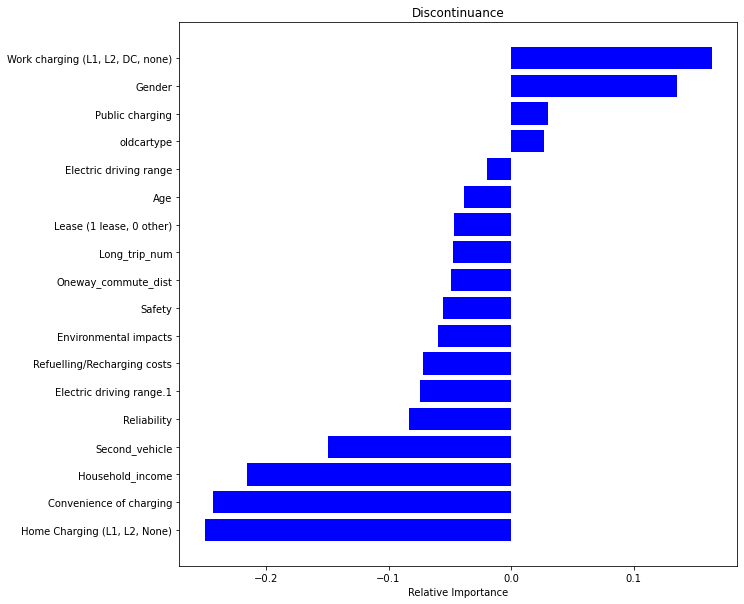

In [76]:
names =['Electric driving range', 'oldcartype',
       'Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Public charging', 'Second_vehicle',
       'Lease (1 lease, 0 other)']
plt.figure(figsize=(10,10)) 
plt.title('Discontinuance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [77]:
#dropping Electric driving range, oldcartype, Public charging
df2.drop(['Electric driving range','oldcartype', 'Public charging'], axis=1, inplace=True)
df2.head()

,Age,Gender,Oneway_commute_dist,Long_trip_num,Safety,Refuelling/Recharging costs,Environmental impacts,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Second_vehicle,"Lease (1 lease, 0 other)",Discontinuance (inc. purchased lease) 2
0,0.919355,0.0,0.011548,0.00,0.75,1.0,1.0,0.75,0.75,0.75,0.2,0.5,0.000000,0.122807,0.0,0.0
1,0.596774,1.0,0.015152,0.00,1.00,1.0,1.0,1.00,0.75,1.00,0.1,0.5,0.000000,0.184211,1.0,0.0
2,0.435484,0.0,0.006946,0.00,1.00,1.0,1.0,1.00,1.00,1.00,0.3,1.0,0.666667,0.122807,1.0,1.0
3,0.919355,0.0,0.846326,0.00,1.00,1.0,1.0,1.00,0.75,1.00,1.0,1.0,0.000000,0.350877,0.0,0.0
4,0.758065,0.0,0.008030,0.03,1.00,1.0,1.0,1.00,0.25,1.00,0.7,1.0,0.666667,0.219298,1.0,0.0


In [78]:
for i in range(0,len(df2.columns)):
    for j in  range(0,len(df2.columns)):
        if i!=j:
            corr_1=np.abs(df2[df2.columns[i]].corr(df2[df2.columns[j]]))
            if corr_1 <0.3:
                print( df2.columns[i] , " is not correlated  with ",df2.columns[j], "(", corr_1, ")")
            elif corr_1>0.75:
                print( df2.columns[i] , " is highly  correlated  with ", df2.columns[j], "(", corr_1, ")")

Age  is not correlated  with  Gender ( 0.08831958811703808 )
Age  is not correlated  with  Oneway_commute_dist ( 0.055976681621557306 )
Age  is not correlated  with  Long_trip_num ( 0.00812765987439507 )
Age  is not correlated  with  Safety ( 0.04847038876117258 )
Age  is not correlated  with  Refuelling/Recharging costs ( 0.12256268846129677 )
Age  is not correlated  with  Environmental impacts ( 0.07673068216564426 )
Age  is not correlated  with  Reliability ( 0.05784440132939386 )
Age  is not correlated  with  Electric driving range.1 ( 0.12741349758140455 )
Age  is not correlated  with  Convenience of charging ( 0.1514860174380496 )
Age  is not correlated  with  Household_income ( 0.06853360975939164 )
Age  is not correlated  with  Home Charging (L1, L2, None) ( 0.22508726072791985 )
Age  is not correlated  with  Work charging (L1, L2, DC, none) ( 0.19622136443382196 )
Age  is not correlated  with  Second_vehicle ( 0.021690412454734374 )
Age  is not correlated  with  Lease (1 lease

Work charging (L1, L2, DC, none)    0.164748
Household_income                    0.106225
Second_vehicle                      0.080245
Home Charging (L1, L2, None)        0.047408
Lease (1 lease, 0 other)            0.045599
Safety                              0.044997
Gender                              0.037135
Electric driving range.1            0.036511
Reliability                         0.036388
Long_trip_num                       0.030681
Convenience of charging             0.029309
Environmental impacts               0.023983
Refuelling/Recharging costs         0.003674
Age                                 0.000000
Oneway_commute_dist                 0.000000
dtype: float64


<AxesSubplot:>

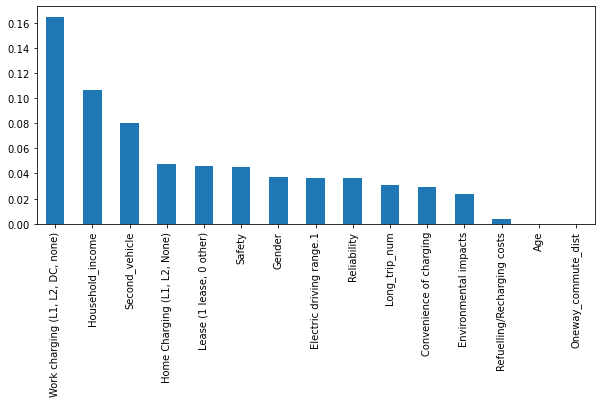

In [79]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
X = df2[['Age', 'Gender',
       'Oneway_commute_dist', 'Long_trip_num', 'Safety',
       'Refuelling/Recharging costs', 'Environmental impacts', 'Reliability',
       'Electric driving range.1', 'Convenience of charging',
       'Household_income', 'Home Charging (L1, L2, None)',
       'Work charging (L1, L2, DC, none)', 'Second_vehicle',
       'Lease (1 lease, 0 other)']]
y = df2['Discontinuance (inc. purchased lease) 2']
mi = mutual_info_regression(X, y)
mi = pd.Series(mi)
mi.index = X.columns
print(mi.sort_values(ascending=False))
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [80]:
df2.drop(['Oneway_commute_dist','Environmental impacts', 'Lease (1 lease, 0 other)'], axis=1, inplace=True)
df2.head()

,Age,Gender,Long_trip_num,Safety,Refuelling/Recharging costs,Reliability,Electric driving range.1,Convenience of charging,Household_income,"Home Charging (L1, L2, None)","Work charging (L1, L2, DC, none)",Second_vehicle,Discontinuance (inc. purchased lease) 2
0,0.919355,0.0,0.00,0.75,1.0,0.75,0.75,0.75,0.2,0.5,0.000000,0.122807,0.0
1,0.596774,1.0,0.00,1.00,1.0,1.00,0.75,1.00,0.1,0.5,0.000000,0.184211,0.0
2,0.435484,0.0,0.00,1.00,1.0,1.00,1.00,1.00,0.3,1.0,0.666667,0.122807,1.0
3,0.919355,0.0,0.00,1.00,1.0,1.00,0.75,1.00,1.0,1.0,0.000000,0.350877,0.0
4,0.758065,0.0,0.03,1.00,1.0,1.00,0.25,1.00,0.7,1.0,0.666667,0.219298,0.0


In [94]:
df2['Discontinuance (inc. purchased lease) 2'].value_counts()

0    860
1    417
Name: Discontinuance (inc. purchased lease) 2, dtype: int64

<AxesSubplot:xlabel='Discontinuance (inc. purchased lease) 2', ylabel='count'>

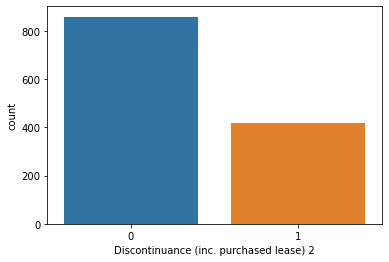

In [95]:
import seaborn as sns
y = df2['Discontinuance (inc. purchased lease) 2']
sns.countplot(x = y, data = df2)

# Splitting Data

In [81]:
df2 = df2.astype({'Discontinuance (inc. purchased lease) 2': 'int64'})
arr = np.array(df2)
X = arr[:,0:-1]
Y= arr[:,-1]
print(arr.shape)
print(X.shape)
print(Y.shape)
print(df2.dtypes)
(unique, counts) = np.unique(Y, return_counts=True)
print(unique, counts)

(1277, 13)
(1277, 12)
(1277,)
Age                                        float64
Gender                                     float64
Long_trip_num                              float64
Safety                                     float64
Refuelling/Recharging costs                float64
Reliability                                float64
Electric driving range.1                   float64
Convenience of charging                    float64
Household_income                           float64
Home Charging (L1, L2, None)               float64
Work charging (L1, L2, DC, none)           float64
Second_vehicle                             float64
Discontinuance (inc. purchased lease) 2      int64
dtype: object
[0. 1.] [860 417]


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 245, stratify=Y)
(unique_train, counts_train) = np.unique(Y_train, return_counts=True)
print(unique_train, counts_train)
(unique_test, counts_test) = np.unique(Y_test, return_counts=True)
print(unique_test, counts_test)

[0. 1.] [601 292]
[0. 1.] [259 125]


In [83]:
np.save('Data/X_train', X_train)
np.save('Data/X_test', X_test)
np.save('Data/Y_train', Y_train)
np.save('Data/Y_test', Y_test)

# OverSampling Training Data

In [84]:
!pip install imblearn

## SMOTE

In [85]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import numpy as np
# define dataset
X = np.load('Data/X_train.npy')
y = np.load('Data/Y_train.npy')
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 601, 1.0: 292})


Counter({0.0: 601, 1.0: 601})


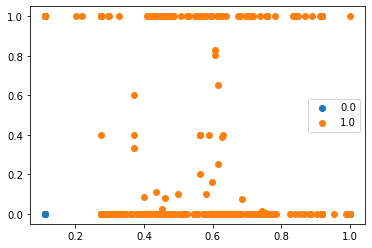

In [86]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [87]:
np.save('Data/X_train_smote', X)
np.save('Data/Y_train_smote', y)

## Borderline SMOTE

In [88]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
import numpy as np
# define dataset
X = np.load('Data/X_train.npy')
y = np.load('Data/Y_train.npy')
# summarize class distribution
counter = Counter(y)
print(counter)


Counter({0.0: 601, 1.0: 292})


Counter({0.0: 601, 1.0: 601})


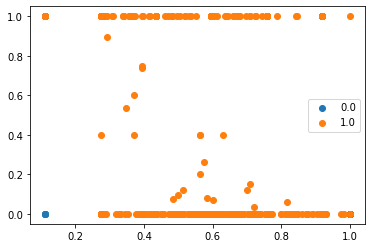

In [89]:
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [90]:
np.save('Data/X_train_borderline_smote', X)
np.save('Data/Y_train_borderline_smote', y)

## ADASYN

In [91]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
import numpy as np
# define dataset
X = np.load('Data/X_train.npy')
y = np.load('Data/Y_train.npy')
# summarize class distribution
counter = Counter(y)
print(counter)


Counter({0.0: 601, 1.0: 292})


Counter({0.0: 601, 1.0: 567})


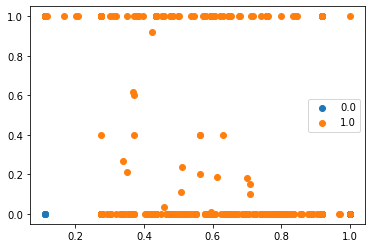

In [92]:
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [93]:
np.save('Data/X_train_adasyn', X)
np.save('Data/Y_train_adasyn', y)